## Accuray(정확도)

In [1]:
import sklearn

print(sklearn.__version__)

1.2.1


In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier 를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
# 사이킷런이 내장 데이터 셋만 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print('### digits.data.shape:', digits.data.shape)
print(digits.target)
print('### digits.target.shape:', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [7]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [9]:
# digits 번호가 7번이면 True, astype(int)로 1로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [10]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 셋 크기: ', y_test.shape)
print('테스트 셋 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 셋 크기:  (450,)
테스트 셋 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision)과 재현율(Recall)

In [13]:
# MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도: ', precision_score(y_test, fakepred))
print('재현율: ', recall_score(y_test, fakepred))

정밀도:  0.0
재현율:  0.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# 오차행렬, 정확도, 정밀도, 재현율 한꺼번에 계산하는 함수 생성
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}'.format(accuracy, precision, recall))

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트데이터 분할
titanic_df = pd.read_csv('./data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:  0.7742, 재현율:  0.7869


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision/Recall Trade-off
- `predict_proba()` 메서드 확인

In [32]:
# predict_proba():  주어진 입력 데이터에 대해 각 클래스에 속할 확률
# 첫 번째 열은 음성 클래스(클래스 0)에 속할 확률을, 두 번째 열은 양성 클래스(클래스 1)에 속할 확률
# predict_proba() 함수를 사용하려면 먼저 학습된 분류 모델을 만들고, 입력 데이터를 모델에 적용한 후에 호출
# lr_clf = LogisticRegression()
# lr_clf.fit(X_train, y_train)

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba() 결과 shape: ", pred_proba.shape, 
      ' -> (n_samples, n_classes): n_samples는 입력 데이터 샘플의 수, n_classes는 클래스의 개수')
print("pred_proba array에서 앞 3개만 샘플로 추출 \n:", pred_proba[:3])

pred_proba() 결과 shape:  (179, 2)  -> (n_samples, n_classes): n_samples는 입력 데이터 샘플의 수, n_classes는 클래스의 개수
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46199779 0.53800221]
 [0.87869178 0.12130822]
 [0.87716524 0.12283476]]


In [18]:
# 예측 확률 array와 예측 결과값 array를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print("두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n", pred_proba_result[:3])

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46199779 0.53800221 1.        ]
 [0.87869178 0.12130822 0.        ]
 [0.87716524 0.12283476 0.        ]]


- `Binarizer`: 연속형 변수를 이진 변수로 변환. 임계값(threshold)을 기준으로 값을 분할하여 이진 변수로 변환

In [33]:
from sklearn.preprocessing import Binarizer

# 연속형 변수를 가진 입력 데이터
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# Binarizer 객체 생성 및 임계값 설정
# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)  # 기본 임계값은 0
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


분류 결정 임계값 0.5 기반에서 Binarizer 이용하여 예측값 변환

In [21]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임계값임
custom_threshold = 0.5

# pred_proba = lr_clf.predict_proba(X_test)
# predict_proba() 반환값의 두번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:  0.7742, 재현율:  0.7869


분류 결정 임계값 0.4 기반에서 Binarizer 이용하여 예측값 변환

In [22]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도:  0.7183, 재현율:  0.8361


여러개의 분류 결정 임계값을 변경하면서 Binarizer 이용하여 예측값 변환

In [23]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도:  0.7183, 재현율:  0.8361
임계값:  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도:  0.7656, 재현율:  0.8033
임계값:  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:  0.7742, 재현율:  0.7869
임계값:  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도:  0.8364, 재현율:  0.7541
임계값:  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도:  0.8824, 재현율:  0.7377


- `precision_recall_curve()`를 이용하여 임계값에 따른 정밀도-재현율 값 추출
    -  실제 타깃값(y_test)과 예측 결과의 확률 값(pred_proba_class1)을 인자로 전달
    - 일반적으로 분류 모델에서 `predict_proba()` 메서드로 얻은 예측 확률 값을 사용

In [34]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print('\nthresholds 5 sample: ', thresholds[:5])
print('precisions 5 sample: ', precisions[:5])
print('recalls 5 sample: ', recalls[:5])

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('\n샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('\n샘플 임계값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)

thresholds 5 sample:  [0.01162687 0.05293433 0.06229046 0.06366001 0.06864432]
precisions 5 sample:  [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample:  [1. 1. 1. 1. 1.]

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]

샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

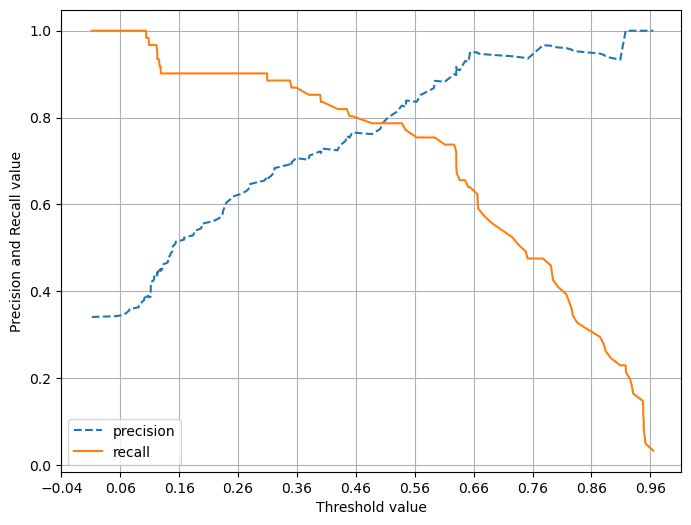

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
    
    # X축을 threshoold값으로, y축을 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle="--", label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

## F1 Score

In [36]:
from sklearn.metrics import f1_score

# pred = lr_clf.predict(X_test)
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [37]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # F1 스코어 추가
    print('정확도: {0:.4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도:  0.7183, 재현율:  0.8361, F1: 0.7727
임계값:  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도:  0.7656, 재현율:  0.8033, F1: 0.7840
임계값:  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도:  0.7742, 재현율:  0.7869, F1: 0.7805
임계값:  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도:  0.8364, 재현율:  0.7541, F1: 0.7931
임계값:  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도:  0.8824, 재현율:  0.7377, F1: 0.8036


## ROC Curve와 AUC

In [38]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


In [40]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print('max predict_proba:', np.max(pred_proba_class1))

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0], '= thresholds[0]은 max(예측확률) + 1로 임의 설정됨')

# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index], 2))


# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR:', np.round(tprs[thr_index], 3))

max predict_proba: 0.9650907074541123
thresholds[0]: 1.9650907074541122 = thresholds[0]은 max(예측확률) + 1로 임의 설정됨
샘플 추출을 위한 임계값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플 index로 추출한 임계값: [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임계값별 FPR: [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임계값별 TPR: [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


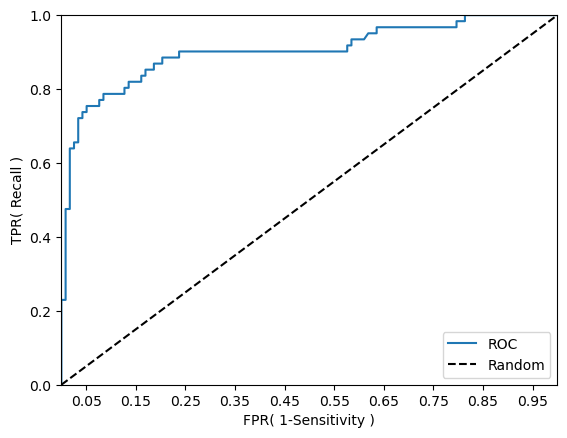

In [41]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale를 0.1 단위로 변경. X, Y축명 설정됨
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1-Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [42]:
from sklearn.metrics import roc_auc_score

### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive 열에 해당

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [45]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC 추가
    print('정확도: {0:.4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))